We will work through the LAB for resampling methods chapter in ISLR.

Basic functions that perform least squares linear regression and other simple analyses come standard with the base distribution named MASS. So we use the library() function to run it. The cv.glm() function is part of the boot library


In [19]:
loadlibraries=function(){
    library('MASS')
    library('class')
    library('ISLR')
    library('boot')
    print('Libraries Loaded')
}

In [20]:
loadlibraries()

[1] "Libraries Loaded"


# 1-

In [21]:
attach(Default)
head(Default)

The following objects are masked from Default (pos = 3):

    balance, default, income, student

The following objects are masked from Default (pos = 4):

    balance, default, income, student

The following objects are masked from Default (pos = 5):

    balance, default, income, student



default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


In [24]:
lorf=glm(default~balance+income,data=Default,family = binomial)
summary(lorf)


Call:
glm(formula = default ~ balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


# 2-

In [62]:
validation_set=function(seed){
    set.seed(seed)
    train=sample(nrow(Default),nrow(Default)/2)
    #We know fit the model on the training set and evaluate it using the validation set.
    lorfv=glm(default~balance+income,data=Default[train,],family=binomial)
    predictions=predict(lorfv,Default[-train,],type = 'response')
    #contrasts(default) We discover the response that is superior to our choosen threshold is corrsponding to defaulting!
    response=rep('No',nrow(Default)/2)
    response[predictions>0.5]='Yes'
    return(mean(response!=Default[-train,1]))
}
results=data.frame('split1'=validation_set(1),'split2'=validation_set(2),'split3'=validation_set(3))
results

split1,split2,split3
0.0286,0.0276,0.0248


As we would expect changing the split modifies the error rate slightly around 0.026, this is due to the fact we only using half of the available data to fit the model.

In [72]:
validation_set2=function(seed){
    set.seed(seed) #We use same split so that the comparaison make sense!
    train=sample(nrow(Default),nrow(Default)/2)
    lorfv=glm(default~.,data=Default,subset=train,family=binomial)
    predictions=predict(lorfv,Default[-train,],type = 'response')
    response=rep('No',nrow(Default)/2)
    response[predictions>0.5]='Yes'
    return(mean(response!=Default[-train,1]))
}
results=data.frame('split1'=validation_set2(1),'split2'=validation_set2(2),'split3'=validation_set2(3))
results

split1,split2,split3
0.0288,0.0286,0.0248


Adding the student dummy variable doesn't reduce the value of test error. 

# 3-

In [76]:
set.seed(1)
lorf=glm(default~balance+income,data=Default,family = binomial)
summary(lorf)
data.frame('balance'=summary(lorf)$coefficients[2,2],'income'=summary(lorf)$coefficients[3,2])


Call:
glm(formula = default ~ balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


balance,income
0.0002273731,4.985167e-06


As you can see above for balance glm returns a std error of: 0.0002273731 while for income it is: 4.985167e-06.

In [78]:
#b-
set.seed(1)
boot.fn=function(data,index){
    return(coef(glm(default~balance+income,data=Default,subset=index,family = binomial)))  
}

In [79]:
boot(Default,boot.fn,1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -8.008379e-03 4.239273e-01
t2*  5.647103e-03  2.299970e-06 2.267955e-04
t3*  2.080898e-05  5.870933e-08 4.582525e-06

The results are slightly different!

# 4-

In [81]:
head(Weekly)
attach(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [83]:
lorf1=glm(Direction~Lag1+Lag2,data=Weekly,family=binomial)
summary(lorf1)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


In [86]:
lorf2=glm(Direction~Lag1+Lag2,data=Weekly[-1,],family=binomial)
summary(lorf2)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly[-1, 
    ])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


In [87]:
Weekly[1,]$Direction
predict(lorf2,Weekly[1,],type='response')>0.5

[1] Down
Levels: Down Up

1 
TRUE

So the classification is inccorrect. Prediction is up while the real Directionis down.

In [94]:
error=rep(NA,nrow(Weekly))
for (i in 1:nrow(Weekly)){
    lorf=glm(Direction~Lag1+Lag2,data=Weekly[-i,],family=binomial)
    error[i]=(predict(lorf,Weekly[i,],type='response')>0.5 && Weekly[i,]$Direction=='Up') || (predict(lorf,Weekly[i,],type='response')<0.5 && Weekly[i,]$Direction=='Down')
}
print('Error rate is:')
1-mean(error)

[1] "Error rate is:"


[1] 0.4499541

Well the model does slightly better than random guessing, nothing surprising since this is a complicated problem. 

# 5-

In [95]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm(100)

$n=100$ and $p=1$

$y=x-2x^2+\epsilon$

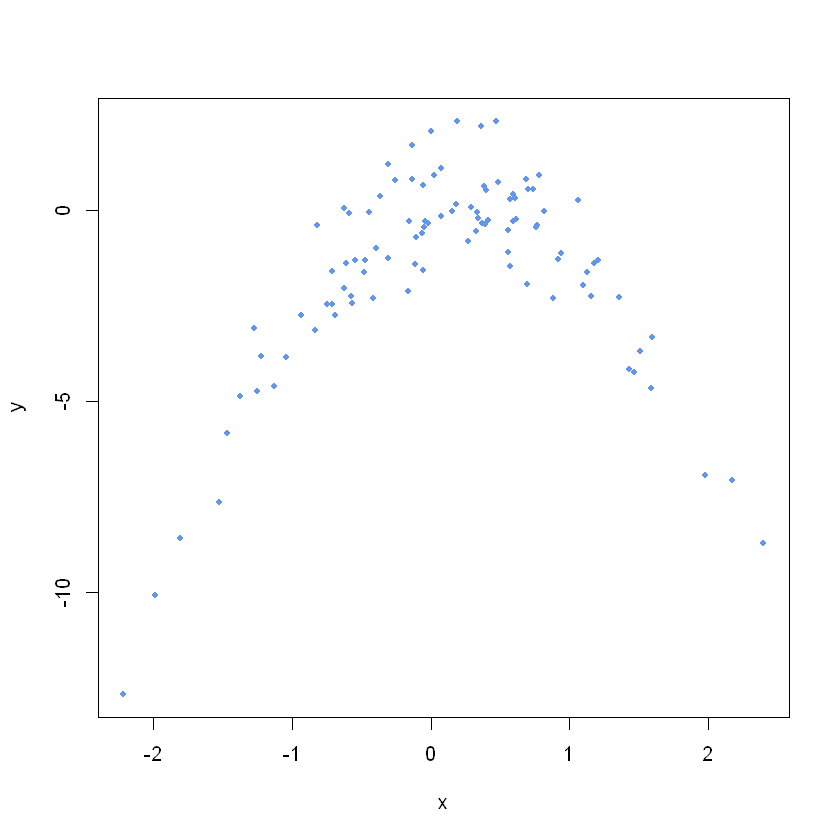

In [96]:
plot(x,y,col='cornflowerblue',pch=20)

In [114]:
set.seed(1)
cvError=rep(0,4)
D=data.frame('x'=x,'y'=y)
for (i in 1:4){
    fit=glm(y~poly(x,i))
    cvError[i]=cv.glm(D,fit)$delta[1]
}
cvError

[1] 7.2881616 0.9374236 0.9566218 0.9539049

In [117]:
set.seed(2)
cvError=rep(0,4)
D=data.frame('x'=x,'y'=y)
for (i in 1:4){
    fit=glm(y~poly(x,i))
    cvError[i]=cv.glm(D,fit)$delta[1]
    print(summary(fit)$coefficients)
}
cvError

             Estimate Std. Error   t value     Pr(>|t|)
(Intercept) -1.550023  0.2600138 -5.961308 3.953542e-08
poly(x, i)   6.188826  2.6001382  2.380191 1.923846e-02
              Estimate Std. Error    t value     Pr(>|t|)
(Intercept)  -1.550023 0.09580323 -16.179231 2.656229e-29
poly(x, i)1   6.188826 0.95803228   6.459934 4.184810e-09
poly(x, i)2 -23.948305 0.95803228 -24.997388 4.584330e-44
               Estimate Std. Error    t value     Pr(>|t|)
(Intercept)  -1.5500226 0.09626318 -16.101926 4.995066e-29
poly(x, i)1   6.1888256 0.96263178   6.429068 4.971565e-09
poly(x, i)2 -23.9483049 0.96263178 -24.877950 1.216703e-43
poly(x, i)3   0.2641057 0.96263178   0.274358 7.843990e-01
               Estimate Std. Error     t value     Pr(>|t|)
(Intercept)  -1.5500226 0.09590514 -16.1620379 5.169227e-29
poly(x, i)1   6.1888256 0.95905143   6.4530695 4.590732e-09
poly(x, i)2 -23.9483049 0.95905143 -24.9708243 1.593826e-43
poly(x, i)3   0.2641057 0.95905143   0.2753822 7.836207e-01
poly(

[1] 7.2881616 0.9374236 0.9566218 0.9539049

We get the same result since we are using a LOOCV, cuz from a set of n observations we can extract n sets with n-1 as size $C^{n-1}_n=n$ and that's exactly the number of models we looking to train so, the random mechanism that chooses the n-1 folds won't affect results of the LOOCV, this cannot be said about other k-folds CVs with $k<n-1$. To put in simple words for babies to understand it: the random mechanism of choice doesn't have any choice compared when using lower tier CV when it has more possibilities to choose from than the acctual number of fitting operations.

e- The smallest corresponds to the quadratic fit, which we would expect since the real function is as such. 

f- The linear model is insignificant, while the quadratic term is very significan in all models it is involved the same is for the first power term. Although beyond quadratic terms all terms are insignificant.

# 6- 